In [13]:
import pandas as pd 
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
%matplotlib inline 
df = pd.read_csv('creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# The fraud filter displays 492 rows & 31 columns. 
# The non fraud class provides 284,315 rows & 31 columns. 

filt = (df['Class'] == 1)
fraud = df[filt]

filt_2 = (df['Class'] == 0)
non_fraud = df[filt_2]

In [7]:
# This cell represents the percentage breakdown of fraud versus non fraud. 

print("A percentage breakdown of fraud versus non fraud in the dataset.\n")
diff = df['Class'].value_counts(normalize = True)
print(diff)

print("\nThe actual numbers in the set accounted for in fraud versus non fraud\n")
fraud_breakdown = df['Class'].value_counts()
print(fraud_breakdown)

A percentage breakdown of fraud versus non fraud in the dataset.

0    0.998273
1    0.001727
Name: Class, dtype: float64

The actual numbers in the set accounted for in fraud versus non fraud

0    284315
1       492
Name: Class, dtype: int64



The general NON FRAUD set statistics:

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64



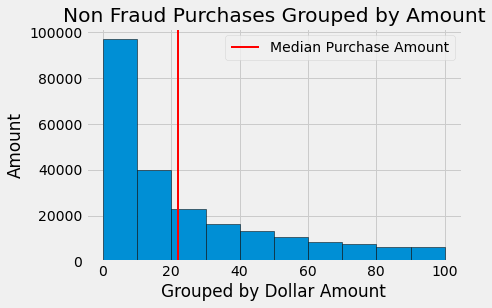

In [8]:
# initialize our series in order to create histograms
nf_amount = non_fraud["Amount"]
f_amount = fraud["Amount"]

print("\nThe general NON FRAUD set statistics:\n\n" + str(non_fraud.Amount.describe())+'\n')

plt.style.use('fivethirtyeight')
bins = list(range(0, 101, 10))
plt.hist(nf_amount, bins = bins, edgecolor = "black")
median_nf = nf_amount.median()
plt.axvline(median_nf, color = 'red', label = 'Median Purchase Amount', linewidth = 2)

plt.title('Non Fraud Purchases Grouped by Amount')
plt.xlabel('Grouped by Dollar Amount')
plt.ylabel('Amount')
plt.legend();


The general FRAUD set statistics:

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64



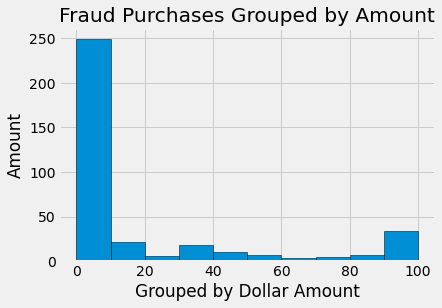

In [9]:
print("\nThe general FRAUD set statistics:\n\n" + str(fraud.Amount.describe())+'\n')

plt.style.use('fivethirtyeight')
bins = list(range(0, 101, 10))
plt.hist(f_amount, bins = bins, edgecolor = "black")
median_fraud = f_amount.mean()

plt.title('Fraud Purchases Grouped by Amount')
plt.xlabel('Grouped by Dollar Amount')
plt.ylabel('Amount');


In [10]:
print("Shape of the fraud set: \n" +str(fraud.shape))
print("Shape of the non-fraud set: \n"+str(non_fraud.shape))
fraud_oversample = fraud.sample(284315, replace = True)
print("Shape on the fraud oversample set: \n" + str(fraud_oversample.shape))

Shape of the fraud set: 
(492, 31)
Shape of the non-fraud set: 
(284315, 31)
Shape on the fraud oversample set: 
(284315, 31)


In [11]:
synthetic_df = pd.concat([non_fraud, fraud_oversample], axis = 0)

print("The fraud data has been synthetically reproduced, and is now stored in the dataframe synthetic_df. \nThe cases of fraud and non-fraud are now equally distributed.")
synthetic_df['Class'].value_counts()

The fraud data has been synthetically reproduced, and is now stored in the dataframe synthetic_df. 
The cases of fraud and non-fraud are now equally distributed.


1    284315
0    284315
Name: Class, dtype: int64

In [14]:
# Prepping Data Through Train Test Split


# Start by splitting our data by dropping the 'Class' field which just leaves the fields that we will be using 
# to make a prediction as our features matrix.

# Ideally we want this to split features and labels into three different datasets; feautures, labels, and tests. 
# Unfortunaly the train test split method can only handle splitting data in two. Therefore we must do the split 
# two seperate passes. In the first pass we tell the method to set aside 40% of the data to be set aside for our 
# test set. That will leave the 60% that we want for our training set, and then we will take the 40% through the split 
# again to leave 20% for validation, and 20% for the test set. 

# X train & x test will take the features and split them into two.
# Y train & Y test will take the labels and split them into two. 

# training - 20% (y_train)
# validation - 20% (y_val)
# test - 60% (y_test)

features = df.drop('Class', axis=1)
labels = df['Class']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [16]:
# create a for loop to confirm our distributions. 
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset)/ len(labels), 2))
    
# next step write out the data to new csvs

0.6
0.2
0.2


In [ ]:
#From Khoa 
# Use random samples on the dataset, random rows from the set, and run the algorithms. Choosing random rows from the
# set to how it affects ML algorithms. 

### Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.


Time?
contains the seconds elapsed between each transaction and the first transaction in the dataset.

V1 - V28?
The data is scaled down through PCA for a couple of reasons. Firstly it reduces the range of the variables allowing for faster machine learning, simplicity, and easy visualizations. Secondly, without a PCA transformation larger numbers would hold a higher weighting potentially leading to biased results. 

Amount 
The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.

Class
Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


### Variable Explanation
It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.



### PCA Explanation 

WHAT IS PRINCIPAL COMPONENT ANALYSIS?
Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

So to sum up, the idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as 
possible.


WHY SCALE?
More specifically, the reason why it is critical to perform standardization prior to PCA, is that the latter is quite sensitive regarding the variances of the initial variables. That is, if there are large differences between the ranges of initial variables, those variables with larger ranges will dominate over those with small ranges (For example, a variable that ranges between 0 and 100 will dominate over a variable that ranges between 0 and 1), which will lead to biased results. So, transforming the data to comparable scales can prevent this problem.